# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('data/train.csv')
df_val = pd.read_csv('data/val.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train, df_val], axis=0)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,23.90,80.0,6.0,6.0,1,1,1,1,Nhà mặt phố,8.0,5.000000,Long Biên
1,7.40,59.0,5.0,4.0,0,0,0,0,Nhà mặt phố,3.0,5.180581,Bắc Từ Liêm
2,8.40,45.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.180581,Thanh Xuân
3,5.25,35.0,4.0,3.0,1,1,1,0,Nhà trong hẻm,2.5,3.300000,Hà Đông
4,26.00,55.0,9.0,7.0,1,1,1,1,Nhà trong hẻm,7.0,5.180581,Thanh Xuân
...,...,...,...,...,...,...,...,...,...,...,...,...
644,27.00,125.0,5.0,3.0,1,1,1,1,Nhà mặt phố,8.0,6.000000,Ngoại thành
645,31.00,75.0,8.0,10.0,1,1,1,1,Nhà trong hẻm,6.0,6.200000,Thanh Xuân
646,2.80,85.0,5.0,4.0,0,0,0,0,Nhà mặt phố,4.0,4.000000,Ngoại thành
647,12.00,54.0,4.0,6.0,0,0,0,0,Nhà trong hẻm,3.0,4.300000,Hai Bà Trưng


# Visualize bar chart with each feature

In [3]:
features = df.drop(columns=['price', 'area', 'street_in_front_of_house', 'width'])
total_features = features.columns.to_list()
total_features

['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'district']

In [4]:
feature_unique_fields = {}
for i in total_features:
    feature_unique_fields[i] = features[i].unique().tolist()

len_features = len(feature_unique_fields)
for i in range(len_features):
    list(feature_unique_fields.values())[i].sort()
feature_unique_value = {}
for feature in total_features:
    # print("Feature: \n", feature)
    feature_len = len(feature_unique_fields[feature])
    # print("Len: ", feature_len)
    feature_value = feature_unique_fields[feature]
    # print(feature_value)
    feature_unique_value[feature] = [sum(df[df[feature] == feature_value[i]].price) / df[feature].value_counts()[feature_value[i]] for i in range(feature_len)]
    
# print(feature_unique_value)
feature_unique_fields


{'floor_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'bedroom_number': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'is_dinning_room': [0, 1],
 'is_kitchen': [0, 1],
 'is_terrace': [0, 1],
 'is_car_pack': [0, 1],
 'type': ['Căn hộ chung cư', 'Nhà mặt phố', 'Nhà trong hẻm'],
 'district': ['Ba Đình',
  'Bắc Từ Liêm',
  'Cầu Giấy',
  'Gia Lâm',
  'Hai Bà Trưng',
  'Hoàn Kiếm',
  'Hoàng Mai',
  'Hà Đông',
  'Long Biên',
  'Nam Từ Liêm',
  'Ngoại thành',
  'Thanh Xuân',
  'Tây Hồ',
  'Đông Anh',
  'Đống Đa']}

In [5]:
visualized_features = total_features
name_of_features = ['floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'type',
 'direction',
 'city',
 'district']
labels = ['Số tầng', 'Số phòng ngủ', 'Có phòng ăn hay không', 'Có phòng bếp hay không', 'Có sân thượng hay không', 
'Có chỗ để xe hay không','Loại bất động sản','Thành phố', 'Quận/Huyện']
titles = ['Biểu đồ thể hiện giá nhà trung bình theo số tầng nhà','Biểu đồ giá nhà trung bình theo số phòng ngủ', 'Biểu đồ giá nhà trung bình theo phòng ăn', 
'Biểu đồ giá nhà trung bình có và không có bếp', 'Giá nhà trung bình với sân thượng', 'Giá nhà trung bình với chỗ để xe', 
'Biểu đồ thể hiện giá nhà trung bình theo loại bất động sản', 
'Biểu đồ thể hiện giá nhà trung bình theo thành phố', 'Biểu đồ thể hiện giá nhà trung bình theo quận/huyện bất động sản']

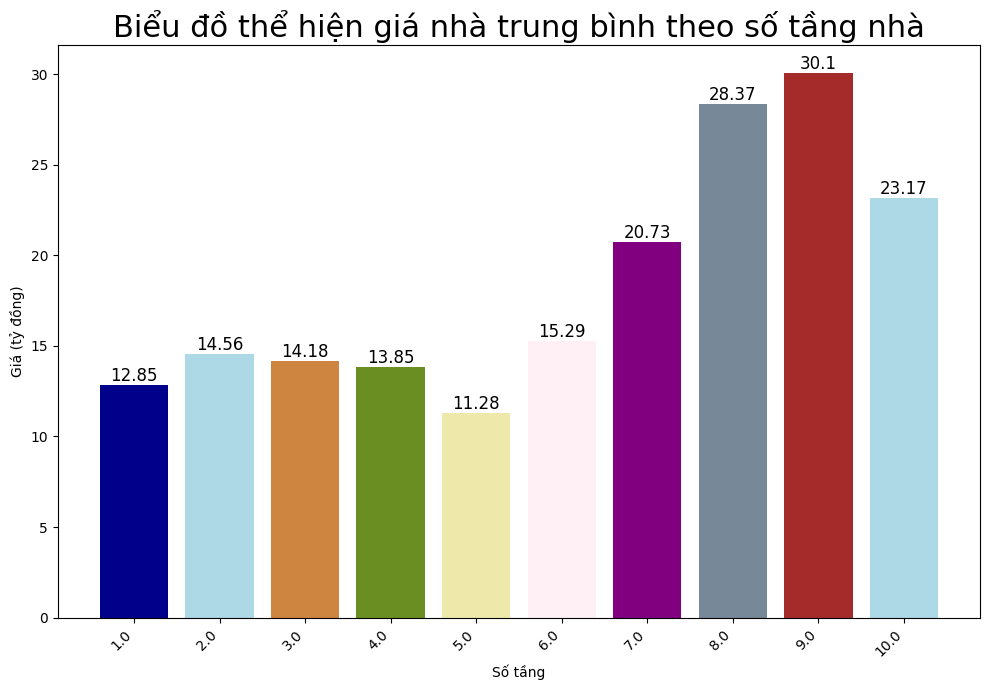

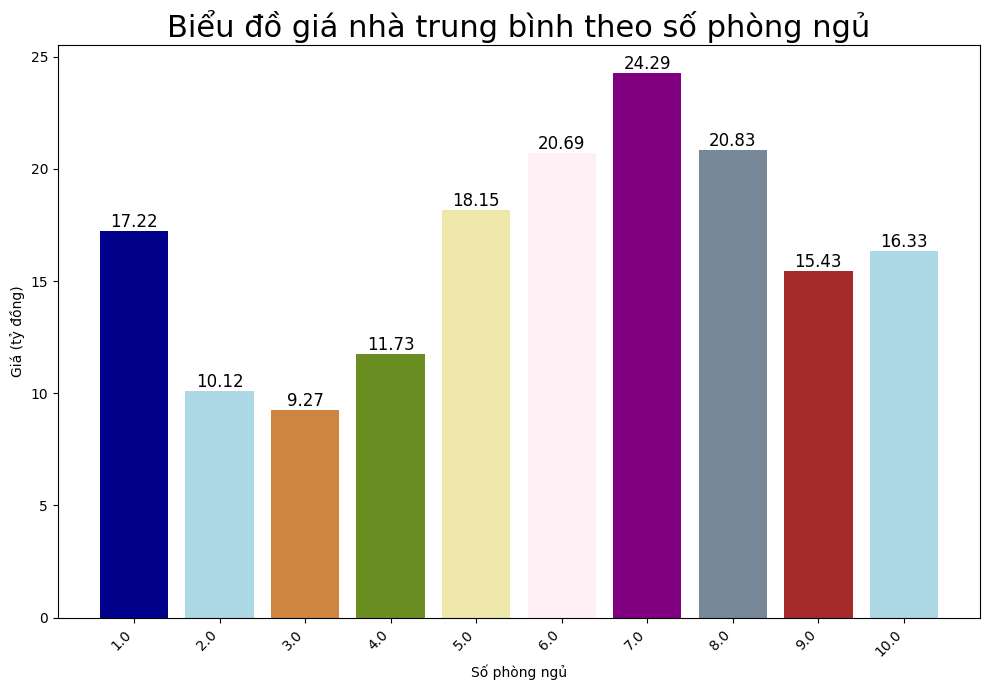

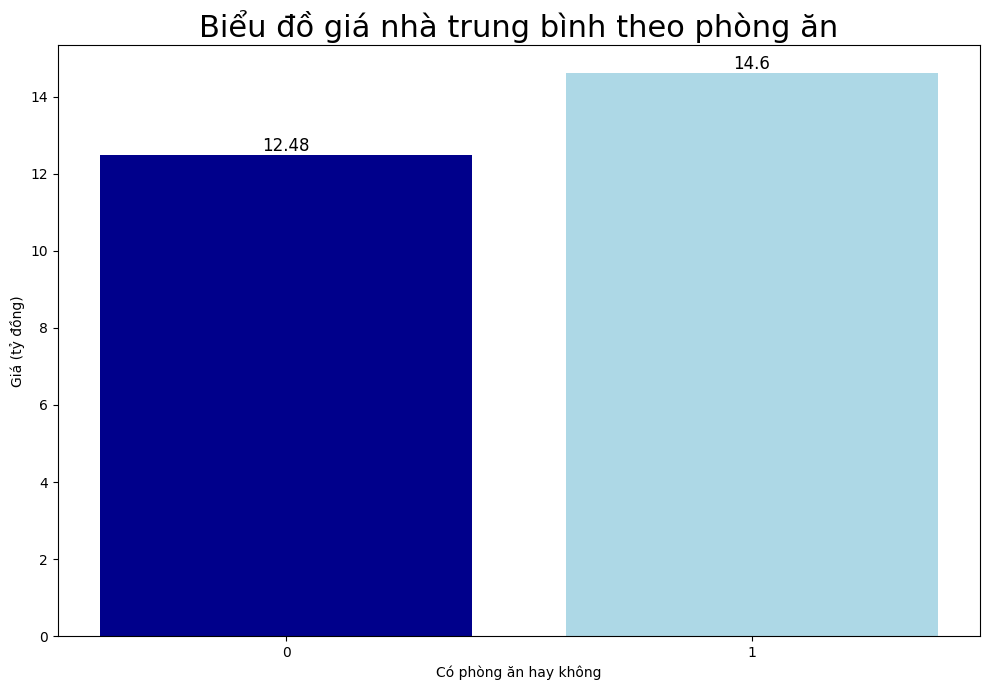

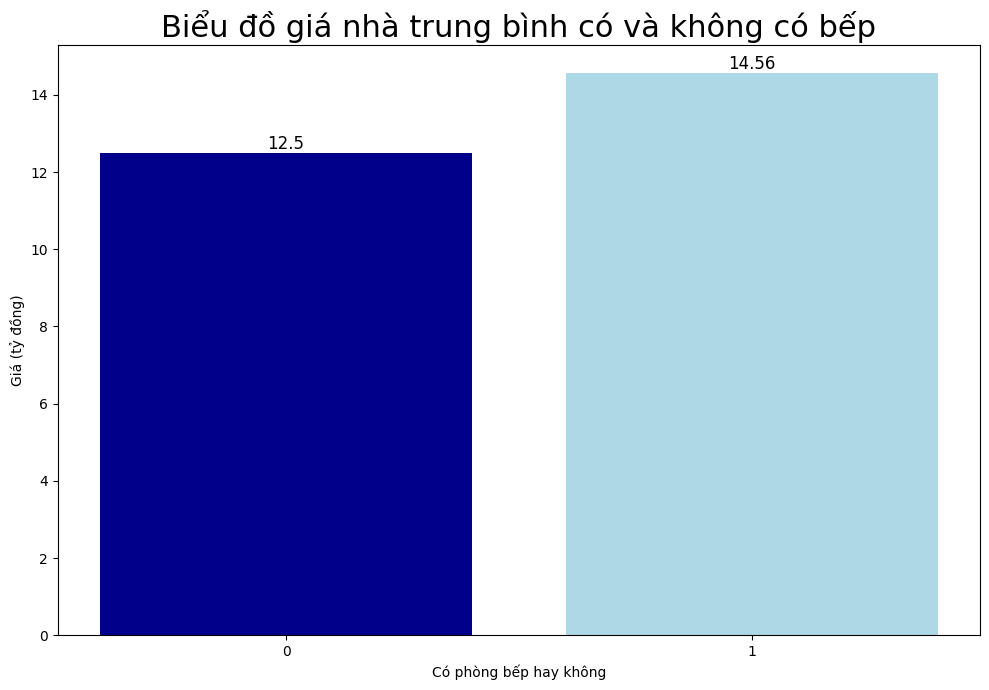

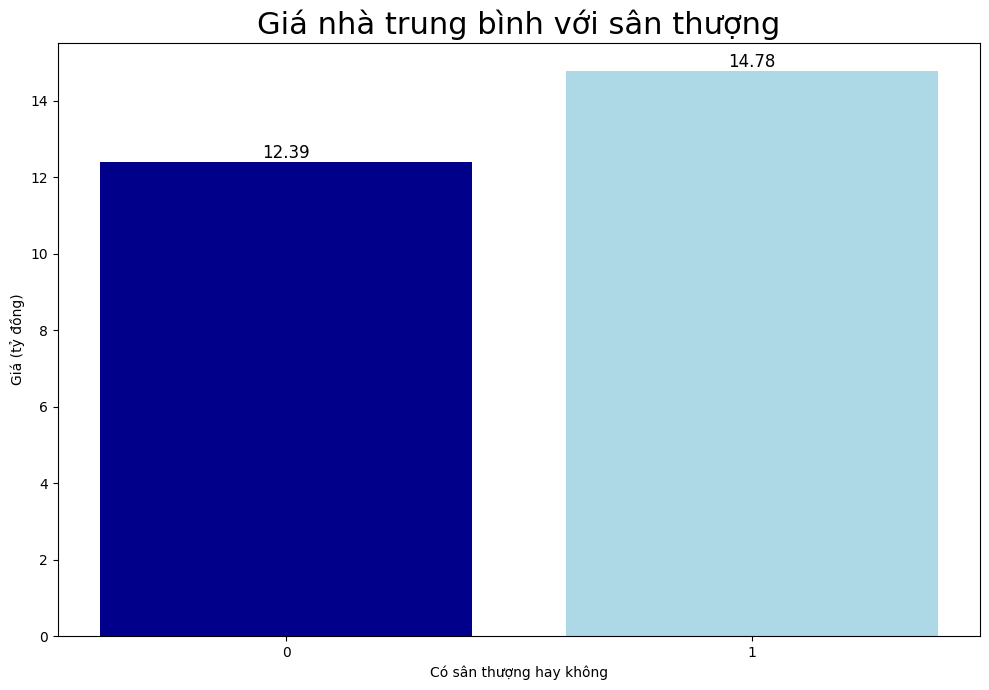

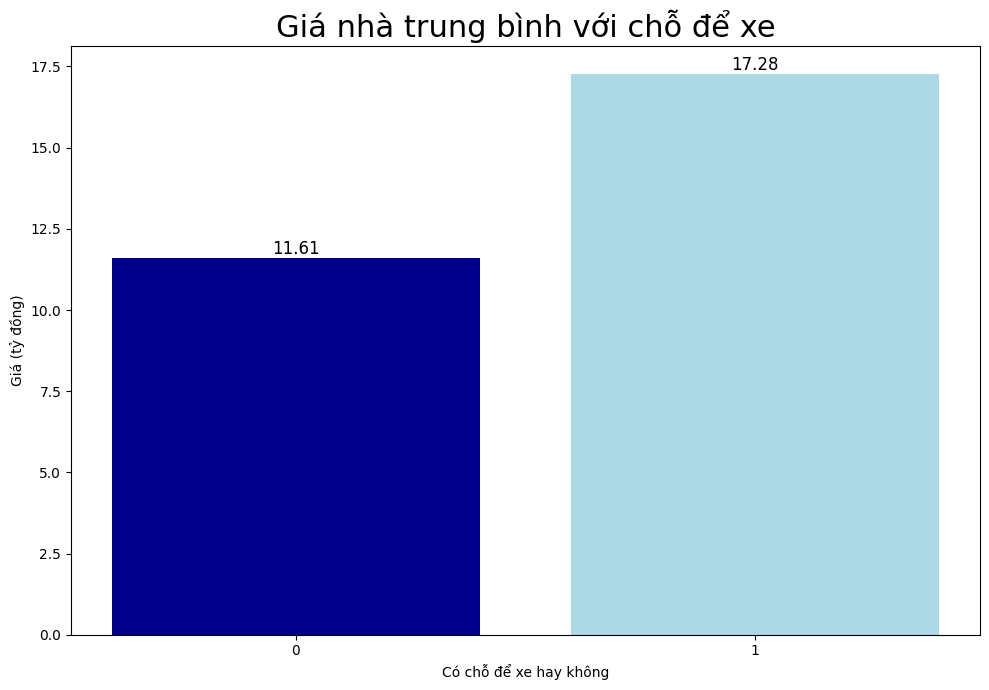

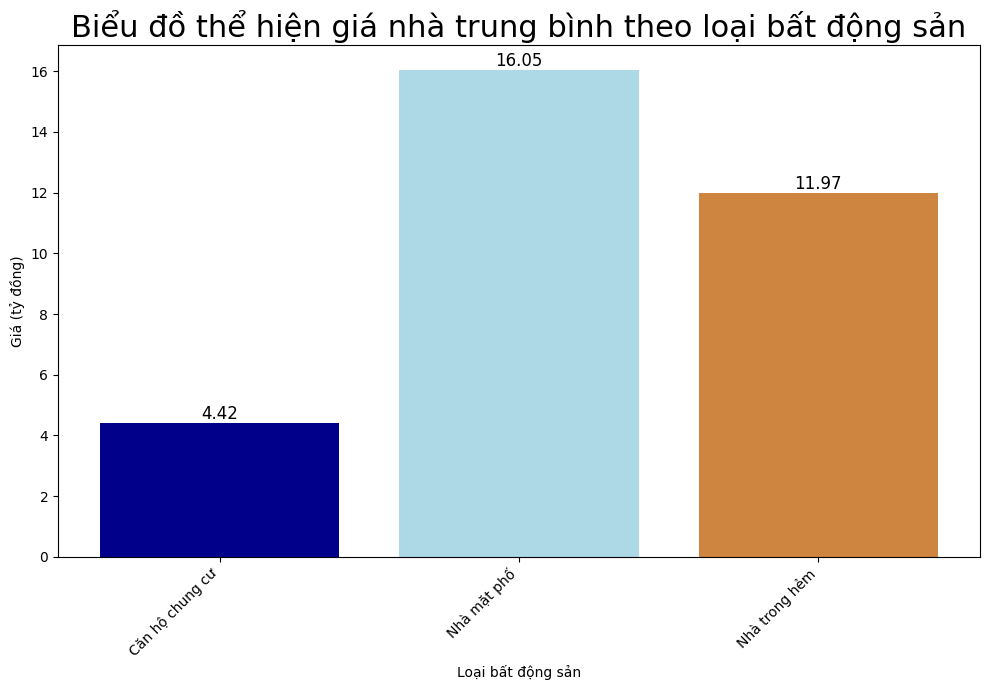

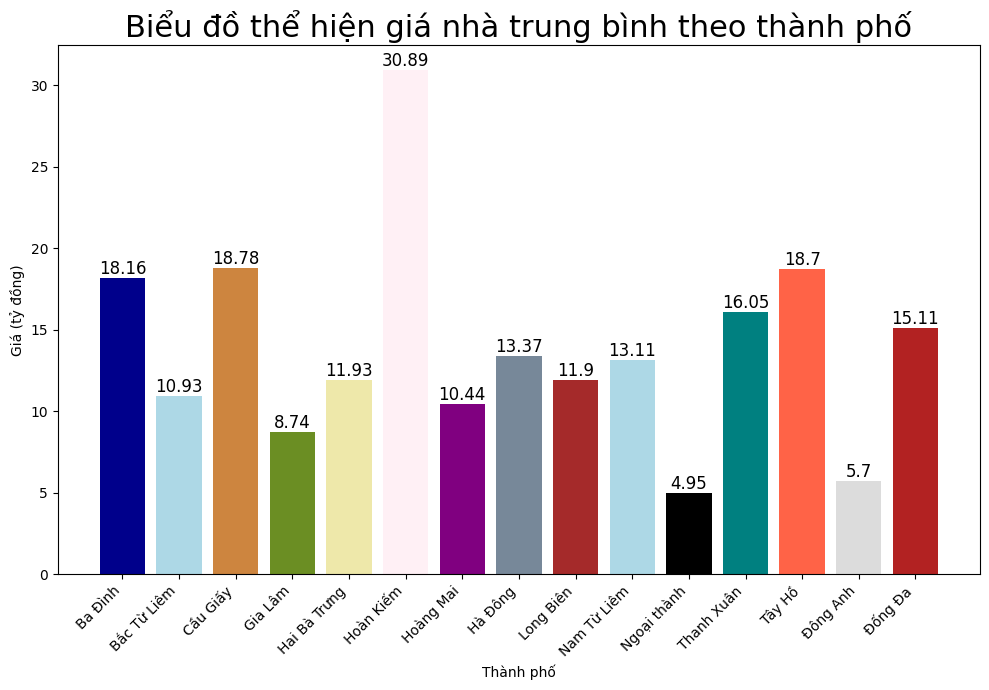

In [6]:
import random
count = 0
for feature in visualized_features:
    N = len(feature_unique_value[feature])
    ind = np.arange(N) 
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=N) 
    text_value = {}
    for i in ind:
        text_value[i] = feature_unique_value[feature][i]
        
    fig = plt.subplots(figsize=(10, 7))
    plt.bar(ind, feature_unique_value[feature], color=c)
    
    for key in text_value:
        plt.text(key, text_value[key], float(round(text_value[key], 2)), 
                horizontalalignment='center', verticalalignment='bottom', 
                fontdict={'fontweight':500, 'size':12})
    
    # Decide whether to rotate labels based on number of categories and label length
    max_label_length = max([len(str(label)) for label in feature_unique_fields[feature]])
    available_width = 10  # Figure width in inches
    
    # Apply rotation if many values or long labels
    if N > 5 or (N * max_label_length > 30):
        plt.xticks(ind, list(feature_unique_fields[feature]), rotation=45, ha='right')
    else:
        plt.xticks(ind, list(feature_unique_fields[feature]))  # No rotation
    
    plt.xlabel(labels[count])
    plt.ylabel("Giá (tỷ đồng)")
    plt.title(titles[count], fontsize=22)
    plt.tight_layout()
    count += 1
    
plt.show()

# Preprocessing to be ready for predict 

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
numerical_cols = features_numerical.columns.tolist()

numerical_cols.remove('price')
numerical_cols

['area',
 'floor_number',
 'bedroom_number',
 'is_dinning_room',
 'is_kitchen',
 'is_terrace',
 'is_car_pack',
 'street_in_front_of_house',
 'width']

In [9]:
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
categorical_cols = features_categorical.columns.tolist()
categorical_cols

['type', 'district']

In [10]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)     
    ],
    remainder='passthrough' 
)


In [11]:
y_train = df_train['price'].copy()
y_val = df_val['price'].copy()

df_train = df_train.drop(['price'], axis = 1)
df_val = df_val.drop(['price'], axis = 1)

In [12]:
y_train.to_numpy()
y_val.to_numpy()

array([ 3.2  ,  8.95 , 14.2  , 20.   , 34.5  , 28.5  ,  3.15 ,  4.   ,
        9.   , 22.   , 15.5  , 13.6  , 14.7  ,  6.2  ,  6.5  , 22.5  ,
       10.3  ,  7.5  , 14.2  , 12.5  , 19.2  , 10.   , 20.   , 19.   ,
       11.   ,  9.8  ,  6.3  ,  6.9  , 16.5  , 14.1  ,  7.3  , 12.   ,
        1.7  ,  9.9  ,  6.95 ,  7.2  ,  8.95 ,  7.5  ,  7.5  ,  1.65 ,
       23.5  ,  9.6  ,  4.75 ,  8.3  , 19.   , 13.6  ,  8.65 ,  5.85 ,
        6.95 , 15.5  ,  3.5  , 16.6  ,  8.6  ,  5.8  ,  1.15 , 38.   ,
        6.3  ,  6.5  , 16.8  ,  7.7  ,  6.4  , 45.   , 26.5  , 13.5  ,
        8.5  ,  5.8  , 40.   , 30.   ,  5.5  ,  8.9  ,  1.6  , 25.   ,
        5.8  ,  7.6  , 10.8  , 20.   ,  8.8  ,  6.85 , 34.   , 13.2  ,
        3.7  , 25.5  ,  8.   ,  3.35 , 11.5  , 12.7  , 28.   , 15.9  ,
        8.4  ,  2.25 ,  9.3  ,  5.6  , 48.   , 27.5  ,  5.4  , 21.6  ,
       10.8  , 41.   , 16.   ,  8.1  ,  6.9  ,  4.8  ,  7.5  , 17.   ,
        5.2  , 29.2  , 27.7  , 27.   , 18.6  , 10.   ,  6.3  , 19.5  ,
      

In [13]:
y_train.shape, y_val.shape

((1945,), (649,))

In [14]:
X_train = preprocessor.fit_transform(df_train)
X_val = preprocessor.transform(df_val)
X_test = preprocessor.transform(df_test)

In [15]:
from matplotlib import pyplot as plt

def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('XGBoost')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

# Decision tree learning

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
# Decision tree (single tree)
from sklearn.tree import DecisionTreeRegressor

tree_validation_errors = []

for r in range(10):
  model = DecisionTreeRegressor(random_state=r)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)
  tree_validation_errors.append(mse)

print("average validation error: ", np.mean(tree_validation_errors))

average validation error:  46.89828266745848


In [18]:
best_seed = np.argmin(tree_validation_errors)
tree_model = DecisionTreeRegressor(random_state=best_seed)
tree_model.fit(X_train, y_train)
y_test_pred = tree_model.predict(X_test)
tree_model_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
tree_model_submit.to_csv('results/tree_model.csv', index=False)

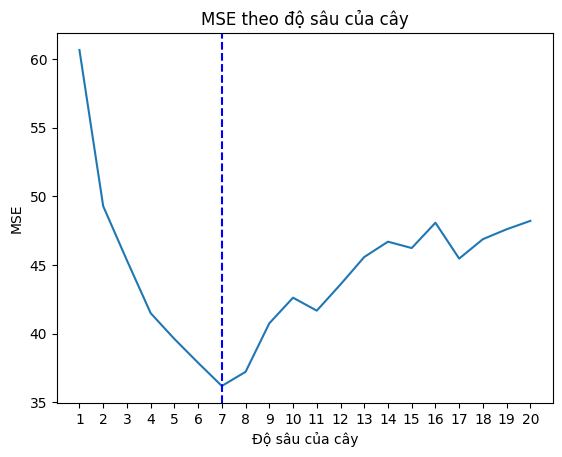

In [ ]:
# Decision tree with varying depth
depths = np.arange(1, 21)
tree_validation_errors = []

for depth in depths:
  model = DecisionTreeRegressor(max_depth=depth, random_state=best_seed)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)
  tree_validation_errors.append(mse)
plt.plot(depths, tree_validation_errors)
plt.axvline(x=depths[np.argmin(tree_validation_errors)], color='blue', linestyle='--')
plt.xlabel('Độ sâu của cây')
plt.xticks(depths)
plt.ylabel('MSE')
plt.title('MSE theo độ sâu của cây')
plt.show()

In [20]:
best_depth = depths[np.argmin(tree_validation_errors)]
tree_limit_model = DecisionTreeRegressor(max_depth=best_depth, random_state=best_seed)
tree_limit_model.fit(X_train, y_train)
y_test_pred = tree_limit_model.predict(X_test)
tree_limit_model_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
tree_limit_model_submit.to_csv('results/tree_limit_model.csv', index=False)

best alpha:  0.622642128375289


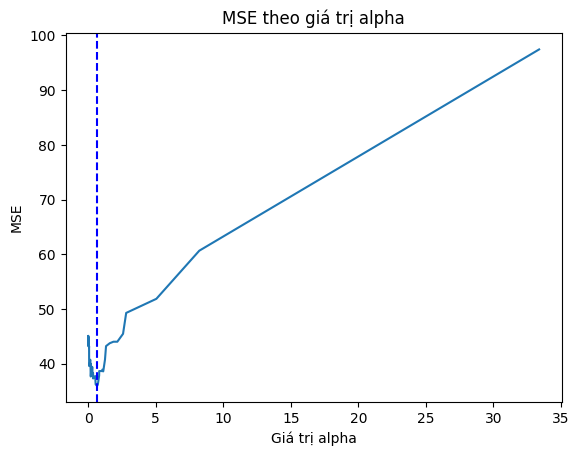

In [ ]:
# Decision tree with cost complexity pruning
model = DecisionTreeRegressor(random_state=best_seed, max_depth=best_depth)
model.fit(X_train, y_train)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

tree_validation_errors = []
for ccp_alpha in ccp_alphas:
  model = DecisionTreeRegressor(random_state=best_seed, ccp_alpha=ccp_alpha)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  mse = mean_squared_error(y_val, y_pred)
  tree_validation_errors.append(mse)
print("best alpha: ", ccp_alphas[np.argmin(tree_validation_errors)])
plt.plot(ccp_alphas, tree_validation_errors)
plt.axvline(x=ccp_alphas[np.argmin(tree_validation_errors)], color='blue', linestyle='--')
plt.xlabel('Giá trị alpha')
plt.ylabel('MSE')
plt.title('MSE theo giá trị alpha')
plt.show()

In [22]:
best_ccp_alpha = ccp_alphas[np.argmin(tree_validation_errors)]
tree_pruned_model = DecisionTreeRegressor(random_state=best_seed, ccp_alpha=best_ccp_alpha)
tree_pruned_model.fit(X_train, y_train)
y_test_pred = tree_pruned_model.predict(X_test)
tree_pruned_model_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
tree_pruned_model_submit.to_csv('results/tree_pruned_model.csv', index=False)

# BART

In [23]:
import bartz

In [ ]:
# BART model default
bart = bartz.BART.gbart(X_train.T, y_train)
y_val_pred = bart.predict(X_val.T)
y_val_pred = np.average(y_val_pred, axis=0)
mse = mean_squared_error(y_val, y_val_pred)
print("BART validation MSE: ", mse)
y_test_pred = np.average(bart.predict(X_test.T), axis=0)
bart_model_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
bart_model_submit.to_csv('results/bart_model.csv', index=False)

Iteration  100/1100 P_grow=0.57 P_prune=0.43 A_grow=0.30 A_prune=0.37 (burnin)
Iteration  200/1100 P_grow=0.53 P_prune=0.47 A_grow=0.31 A_prune=0.33
Iteration  300/1100 P_grow=0.55 P_prune=0.45 A_grow=0.26 A_prune=0.27
Iteration  400/1100 P_grow=0.49 P_prune=0.51 A_grow=0.21 A_prune=0.26
Iteration  500/1100 P_grow=0.51 P_prune=0.49 A_grow=0.25 A_prune=0.37
Iteration  600/1100 P_grow=0.57 P_prune=0.43 A_grow=0.26 A_prune=0.35
Iteration  700/1100 P_grow=0.56 P_prune=0.44 A_grow=0.31 A_prune=0.26
Iteration  800/1100 P_grow=0.55 P_prune=0.45 A_grow=0.23 A_prune=0.33
Iteration  900/1100 P_grow=0.54 P_prune=0.46 A_grow=0.28 A_prune=0.38
Iteration 1000/1100 P_grow=0.54 P_prune=0.46 A_grow=0.28 A_prune=0.37
Iteration 1100/1100 P_grow=0.56 P_prune=0.44 A_grow=0.30 A_prune=0.25
BART validation MSE:  22.989063750758593


Iteration  100/1100 P_grow=0.30 P_prune=0.70 A_grow=0.00 A_prune=0.00 (burnin)
Iteration  200/1100 P_grow=0.30 P_prune=0.70 A_grow=0.00 A_prune=0.00
Iteration  300/1100 P_grow=0.50 P_prune=0.50 A_grow=0.00 A_prune=0.00
Iteration  400/1100 P_grow=0.30 P_prune=0.70 A_grow=0.00 A_prune=0.00
Iteration  500/1100 P_grow=0.50 P_prune=0.50 A_grow=0.00 A_prune=0.00
Iteration  600/1100 P_grow=0.60 P_prune=0.40 A_grow=0.00 A_prune=0.25
Iteration  700/1100 P_grow=0.40 P_prune=0.60 A_grow=0.25 A_prune=0.00
Iteration  800/1100 P_grow=0.60 P_prune=0.40 A_grow=0.00 A_prune=0.00
Iteration  900/1100 P_grow=0.50 P_prune=0.50 A_grow=0.20 A_prune=0.00
Iteration 1000/1100 P_grow=0.50 P_prune=0.50 A_grow=0.20 A_prune=0.00
Iteration 1100/1100 P_grow=0.30 P_prune=0.70 A_grow=0.00 A_prune=0.00
Iteration  100/1100 P_grow=0.45 P_prune=0.55 A_grow=0.11 A_prune=0.18 (burnin)
Iteration  200/1100 P_grow=0.35 P_prune=0.65 A_grow=0.57 A_prune=0.08
Iteration  300/1100 P_grow=0.45 P_prune=0.55 A_grow=0.11 A_prune=0.09
It

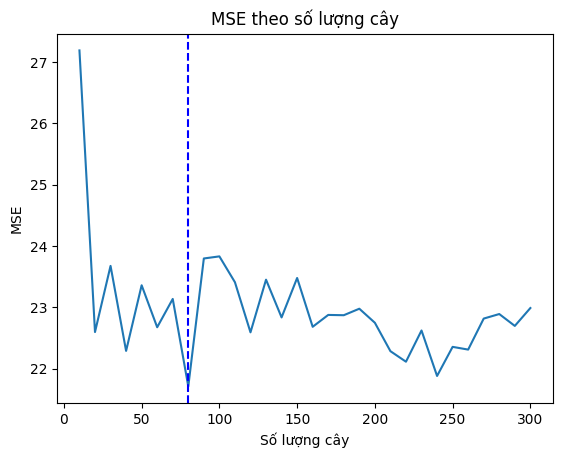

In [31]:
# BART with size tuning (hyperparameter m)
trees_list = np.linspace(10, 300, 30, dtype=int)
bart_validation_errors = []
for trees in trees_list:
    bart = bartz.BART.gbart(X_train.T, y_train, ntree=trees)
    y_val_pred = np.average(bart.predict(X_val.T), axis=0)
    mse = mean_squared_error(y_val, y_val_pred)
    bart_validation_errors.append(mse)

plt.plot(trees_list, bart_validation_errors)
plt.axvline(x=trees_list[np.argmin(bart_validation_errors)], color='blue', linestyle='--')
plt.xlabel('Số lượng cây')
plt.ylabel('MSE')
plt.title('MSE theo số lượng cây')
plt.show()

In [ ]:
best_tree_count = trees_list[np.argmin(bart_validation_errors)]
bart_tree_model = bartz.BART.gbart(X_train.T, y_train, ntree=best_tree_count)
y_test_pred = np.average(bart_tree_model.predict(X_test.T), axis=0)
bart_tree_model_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
bart_tree_model_submit.to_csv('results/bart_tree_model.csv', index=False)

Iteration  100/1100 P_grow=0.57 P_prune=0.43 A_grow=0.30 A_prune=0.37 (burnin)
Iteration  200/1100 P_grow=0.53 P_prune=0.47 A_grow=0.31 A_prune=0.33
Iteration  300/1100 P_grow=0.55 P_prune=0.45 A_grow=0.26 A_prune=0.27
Iteration  400/1100 P_grow=0.49 P_prune=0.51 A_grow=0.21 A_prune=0.26
Iteration  500/1100 P_grow=0.51 P_prune=0.49 A_grow=0.25 A_prune=0.37
Iteration  600/1100 P_grow=0.57 P_prune=0.43 A_grow=0.26 A_prune=0.35
Iteration  700/1100 P_grow=0.56 P_prune=0.44 A_grow=0.31 A_prune=0.26
Iteration  800/1100 P_grow=0.55 P_prune=0.45 A_grow=0.23 A_prune=0.33
Iteration  900/1100 P_grow=0.54 P_prune=0.46 A_grow=0.28 A_prune=0.38
Iteration 1000/1100 P_grow=0.54 P_prune=0.46 A_grow=0.28 A_prune=0.37
Iteration 1100/1100 P_grow=0.56 P_prune=0.44 A_grow=0.30 A_prune=0.25


Iteration  100/1100 P_grow=0.54 P_prune=0.46 A_grow=0.33 A_prune=0.33 (burnin)
Iteration  200/1100 P_grow=0.52 P_prune=0.47 A_grow=0.31 A_prune=0.29
Iteration  300/1100 P_grow=0.50 P_prune=0.50 A_grow=0.33 A_prune=0.22
Iteration  400/1100 P_grow=0.48 P_prune=0.51 A_grow=0.19 A_prune=0.34
Iteration  500/1100 P_grow=0.44 P_prune=0.56 A_grow=0.26 A_prune=0.27
Iteration  600/1100 P_grow=0.52 P_prune=0.47 A_grow=0.34 A_prune=0.36
Iteration  700/1100 P_grow=0.50 P_prune=0.49 A_grow=0.23 A_prune=0.20
Iteration  800/1100 P_grow=0.52 P_prune=0.48 A_grow=0.24 A_prune=0.34
Iteration  900/1100 P_grow=0.50 P_prune=0.49 A_grow=0.32 A_prune=0.36
Iteration 1000/1100 P_grow=0.47 P_prune=0.53 A_grow=0.26 A_prune=0.24
Iteration 1100/1100 P_grow=0.56 P_prune=0.44 A_grow=0.31 A_prune=0.23
Iteration  100/1100 P_grow=0.55 P_prune=0.45 A_grow=0.25 A_prune=0.29 (burnin)
Iteration  200/1100 P_grow=0.56 P_prune=0.44 A_grow=0.27 A_prune=0.22
Iteration  300/1100 P_grow=0.54 P_prune=0.46 A_grow=0.24 A_prune=0.28
It

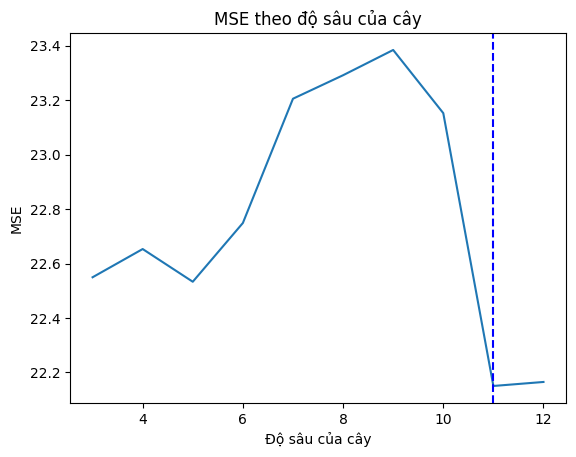

In [ ]:
# BART with hyperparameter tuning for tree depth
depths = np.arange(3, 13)
bart_validation_errors = []
for depth in depths:
    bart = bartz.BART.gbart(X_train.T, y_train, maxdepth=depth)
    y_val_pred = np.average(bart.predict(X_val.T), axis=0)
    mse = mean_squared_error(y_val, y_val_pred)
    bart_validation_errors.append(mse)

plt.plot(depths, bart_validation_errors)
plt.axvline(x=depths[np.argmin(bart_validation_errors)], color='blue', linestyle='--')
plt.xlabel('Độ sâu của cây')
plt.ylabel('MSE')
plt.title('MSE theo độ sâu của cây')
plt.show()

In [ ]:
best_depth = depths[np.argmin(bart_validation_errors)]
bart_depth_model = bartz.BART.gbart(X_train.T, y_train, maxdepth=best_depth)
y_test_pred = np.average(bart_depth_model.predict(X_test.T), axis=0)
bart_depth_model_submit = pd.DataFrame({
  'Id': df_test.index,
  'TARGET': y_test_pred
})
bart_depth_model_submit.to_csv('results/bart_depth_model.csv', index=False)

Iteration  100/1100 P_grow=0.57 P_prune=0.43 A_grow=0.25 A_prune=0.22 (burnin)
Iteration  200/1100 P_grow=0.54 P_prune=0.46 A_grow=0.31 A_prune=0.23
Iteration  300/1100 P_grow=0.56 P_prune=0.44 A_grow=0.34 A_prune=0.32
Iteration  400/1100 P_grow=0.52 P_prune=0.47 A_grow=0.24 A_prune=0.31
Iteration  500/1100 P_grow=0.49 P_prune=0.50 A_grow=0.30 A_prune=0.27
Iteration  600/1100 P_grow=0.55 P_prune=0.45 A_grow=0.26 A_prune=0.30
Iteration  700/1100 P_grow=0.52 P_prune=0.48 A_grow=0.25 A_prune=0.32
Iteration  800/1100 P_grow=0.58 P_prune=0.42 A_grow=0.22 A_prune=0.29
Iteration  900/1100 P_grow=0.55 P_prune=0.45 A_grow=0.30 A_prune=0.31
Iteration 1000/1100 P_grow=0.50 P_prune=0.50 A_grow=0.18 A_prune=0.28
Iteration 1100/1100 P_grow=0.58 P_prune=0.42 A_grow=0.36 A_prune=0.25


# Random forest

In [ ]:
# Random Forest model with hyperparameter tuning for number of trees
trees_list = np.linspace(10, 300, 30, dtype=int)
random_forest_validation_errors = []

for n_trees in trees_list:
    result = []
    # for r in range(10):
    rf_model = RandomForestRegressor(n_estimators=n_trees)
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    result.append(mean_squared_error(y_val, y_val_pred))
    random_forest_validation_errors.append(np.average(result))

plt.figure(figsize=(10, 6))
plt.plot(trees_list, random_forest_validation_errors, label='Validation')
plt.xticks(trees_list)
plt.xlabel('Số cây')
plt.ylabel('MSE')
plt.title('Chọn số cây tốt nhất cho Random Forest')
# plt.legend()
plt.show()

KeyboardInterrupt: 

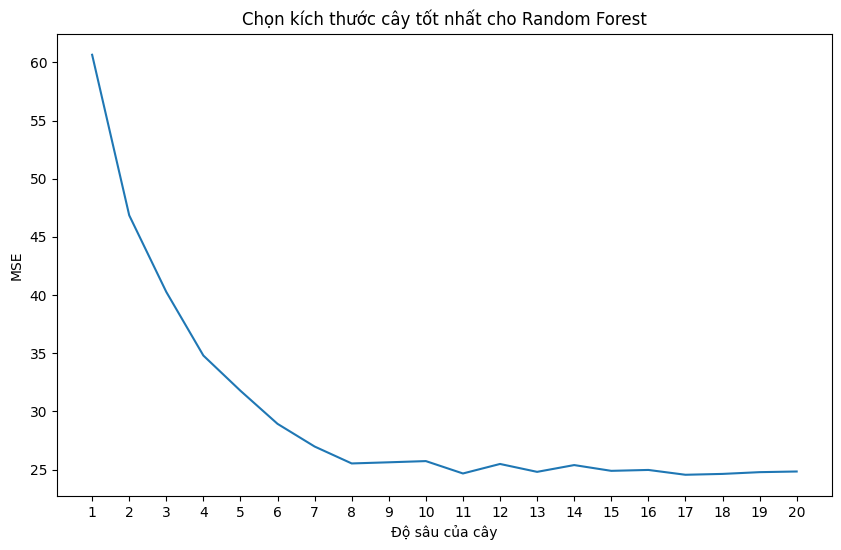

In [ ]:
# Random Forest model with hyperparameter tuning for tree depth
n_trees = trees_list[np.argmin(random_forest_validation_errors)]
tree_depths = np.linspace(1, 20, 20, dtype=int)

errors = []

for d in tree_depths:
    result = []
    # for r in range(10):
    rf_model = RandomForestRegressor(n_estimators=n_trees, max_depth=d)
    rf_model.fit(X_train, y_train)
    result.append(mean_squared_error(y_val, rf_model.predict(X_val)))
    errors.append(np.average(result))

plt.figure(figsize=(10, 6))
plt.plot(tree_depths, errors, label='Validation')
plt.xticks(tree_depths)
plt.xlabel('Độ sâu của cây')
plt.ylabel('MSE')
plt.title('Chọn kích thước cây tốt nhất cho Random Forest')
plt.show()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
rf_model_submit = pd.DataFrame({
  'Id': df_test.index,
  'Target': y_test_pred
})
rf_model_submit.to_csv('results/rf_model.csv', index=False)